# Proyecto Data Science I: Parte II

## *ABSTRACT*



## 1. Introducción <a class="anchor" id="introduccion"></a>

En el presente documento se desarrollará un modelo de predicción del resultado en términos de medallas de los competidores de los juegos olímpicos. Para ésto se analizará una fuente de datos que contiene información sobre los juegos olimpicos modernos, abarcando desde el año 1896 al 2016. En ella existe información sobre los deportistas participantes (nombre, sexo, peso y estatura), los eventos, los comités participantes, el país anfitrión de los respectivos juegos y los resultados en términos de medallas.

La motivación de este proyecto corresponde a explicar que factores predicen de mejor manera el éxito deportivo en los juegos olímpicos, información que será de gran relevancia para los diversos comités olímpicos participantes.

La audiencia de este proyecto abarcaría desde los comités olímpicos antes mencionados, secretarias de deporte del estado o gobernaciones regionales/provinciales, fans de los juegos olímpicos en general.


### 1.1. Hipótesis Iniciales <a class="anchor" id="hipotesis"></a>

Se consideran las siguientes hipótesis iniciales:

* De acuerdo con las variables provistas en el dataset es posible desarrollar un modelo supervisado de clasificación de categorías que prediga el resultado de medalla olímpica (Oro, Plata Bronce o Sin Medalla).

* Se presume que la variable con mayor correlación será el país de origen del competidor.

* Se presume que la variable con menor correlación será el nombre del país anfitrión.

### 1.2. Objetivos <a class="anchor" id="objetivos"></a>

El objetivo principal de este proyecto será desarrollar y validar un modelo de machine learning que sea capaz de predecir, basado en ciertos parámetros de entrada, el resultado de medalla olímpica de un participante.

Para cumplir con este objetivo se propone realizar un modelo de **aprendizaje supervisado** de clasificación, donde las etiquetas para la categoría Medal serán *Gold*, *Silver*, *Bronce* y *No Medal*

Se consideran los siguientes algoritmos para realizar el modelo:

* K-nearest neighbors (KNN)
* Random Forest

### 1.3. Contexto comercial <a class="anchor" id="contexto"></a>

Se espera que un modelo de las características del desarrollado en este trabajo sea de utilidad para los comités olímpicos, ya que puede permitir establecer mecanismos de selección de deportistas basados en las categorías consideradas. Por otro lado, también será posible realizar predicciones sobre nuevos juegos olímpicos basados en los nuevos participantes, que servirían a todo tipo de casas de apuestas, por ejemplo.

### 1.4. Consideraciones  <a class="anchor" id="consideraciones"></a>

El presente dataset contiene información sobre actividades que no serán contempladas en las siguientes secciones:

* *Art Competitions*: Fue una categoría incluida en los juegos olimpicos de verano entre 1912 y 1948 que incluyen competencias en arquitectura, literatura, musica, pintura y escultura. Esta categoría no será considerada por no ser una actividad deportiva de desempeño físico.

* *Winter Olympics*: El dataset incluye información sobre los juegos olimpicos de invierno. Esta información no es de interés para éste trabajo.

### 1.5. Fuente <a class="anchor" id="fuente"></a>

El dataset utilizado se puede encontrar en:

https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results


## 2. Descripción del Dataset <a class="anchor" id="descripcion-dataset"></a>

Este es un dataset historico con informacion sobre los juegos olimpicos de la era moderna, abarcando desde los juegos de Atenas 1896 hasta Rio 2016.

Las columnas que componen el dataset se describen a continuación

* ID - Numero único para cada atleta
* Name - Nombre del atleta
* Sex - Sexo masculino o femenino (M o F)
* Age - Edad como numero entero
* Height - Altura en centimetros
* Weight - Peso en kilogramos
* Team - Nombre del equipo
* NOC - Comité Olimpico Nacional (Codigo de 3 letras)
* Games - Año y temporada
* Year - Año de los juegos olimpicos
* Season - Temporada (verano o invierno)
* City - Ciudad anfitriona
* Sport - Deporte. Se debe tomar en cuenta que existieron las *"Art Competitions"* que no serán contempladas en el presente análisis.
* Event - Evento
* Medal - Medalla obtenida (Oro, plata, bronce o NA)

## 3. Preparación inicial <a class="anchor" id="preparacion-inicial"></a>

In [1]:
# Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Se ignoran alertas para mejorar aspecto del notebook
import warnings
warnings.filterwarnings("ignore")

# Definir el estilo de los gráficos de matplotlib
mpl.style.use("bmh")

In [2]:
# Cargar datos
df = pd.read_csv(filepath_or_buffer="./datasets/athlete_events.csv")

In [3]:
# Se eliminan del análisis los datos del deporte "Art Competitions"
df = df[df["Sport"]!="Art Competitions"]

# Se eliminan del análisis los datos de la temporada de invierno
df = df[df["Season"]!="Winter"]

## 4. Descripción de los datos <a class="anchor" id="descripcion-datos"></a>

### 4.1. Información de los datos <a class="anchor" id="info-datos"></a>

La información de los datos muestra que tenemos un total de 218974 entradas, según la columna ID. Se observa que las siguientes columnas tienen entradas nulas:

* Age
* Height
* Weight
* Medal

En el caso de las columnas Age, Height y Weight, se presume que los datos faltantes no fueron encuestados, ingresados a la base de datos o se perdió la información. En el caso de la columna Medal, es esperable que existan muchos datos nulos, pues solo algunos competidores obtienen medallas olímpicas.

In [4]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 218974 entries, 0 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      218974 non-null  int64  
 1   Name    218974 non-null  object 
 2   Sex     218974 non-null  object 
 3   Age     210292 non-null  float64
 4   Height  170636 non-null  float64
 5   Weight  168643 non-null  float64
 6   Team    218974 non-null  object 
 7   NOC     218974 non-null  object 
 8   Games   218974 non-null  object 
 9   Year    218974 non-null  int64  
 10  Season  218974 non-null  object 
 11  City    218974 non-null  object 
 12  Sport   218974 non-null  object 
 13  Event   218974 non-null  object 
 14  Medal   33932 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 26.7+ MB


### 4.2. Describe - Variables Numéricas<a class="anchor" id="describe-numericas"></a>

Se utiliza el metodo `describe()` para obtener los parámetros estadísticos mas relevantes de las variables numéricas del dataset. Las variables numéricas son:

* ID : Se identifica un total de 218974 entradas. Esta columna no tiene otra relevancia estadísticas, mas que para identificar las entradas.
* Age : Se observa un rango de edades de entre 10 y 72 años, con un promedio de 25.3 años y una desviación estándar de +/-6.0 años.
* Height : Se observa un rango de estaturas de entre 127 y 226 cm, con un promedio de 175.5 cm y una desviación estándar de +/-10.9 cm.
* Weight : Se observa un rango de pesos de entre 25 y 214 kg, con un promedio de 70.6 kg y una desviación estándar de +/-14.8 kg.
* Year : Se observa que los años considerados se encuentran entre 1896 y 2016.

In [5]:
# Descripción de variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,218974.0,68023.420959,39150.001900,1.0,34017.0,68380.5,101909.0,135568.0
Age,210292.0,25.378669,6.092646,10.0,21.0,24.0,28.0,72.0
Height,170636.0,175.515852,10.915257,127.0,168.0,175.0,183.0,226.0
Weight,168643.0,70.687559,14.805520,25.0,60.0,70.0,79.0,214.0
Year,218974.0,1977.021957,30.682110,1896.0,1960.0,1984.0,2000.0,2016.0


### 4.3. Describe - Variables No Numéricas  <a class="anchor" id="describe-no-numericas"></a>

Se utiliza el metodo `describe(exclude="number")` para obtener los parámetros estadísticos mas relevantes de las variables no-numéricas del dataset. Las variables no-numéricas son:

* Name :Se observa que de 218974 entradas hay 114344 únicas.
* Sex : Se observa que la mayor cantidad de participantes han sido Masculinos, con 159908 entradas.
* Team : El equipo con mayor cantidad de participanes es Estados Unidos, con 13964 participantes.
* NOC : La comisión con mayor cantidad de participantes es USA, con 14502 participaciones.
* Games : Los juegos con mayor cantidad de participantes fueron los juegos olimpicos de verano de 2000, con 13821 participantes.
* Season : Solo existe una entrada unica que es 'Summer'. De esta forma, esta columna resulta irrelevanta para futuros análisis.
* City : La mayor cantidad de participantes han participado en juegos realizados en Londres, con 21955 participantes.
* Sport : El deporte con la mayor cantidad de participantes ha sido el Atletismo, con 38624 participantes.
* Event : El evento con mayor cantidad de participantes ha sido el Futbol Masculino, con 5733 participantes.
* Medal : La mayor cantidad de medallas han sido de oro, con 11410 participantes llevandose dicha medalla.

In [6]:
# Descripción de variables categóricas
df.describe(exclude="number").T

,count,unique,top,freq
Name,218974,114344,Heikki Ilmari Savolainen,39
Sex,218974,2,M,159908
Team,218974,1156,United States,13964
NOC,218974,229,USA,14502
Games,218974,29,2000 Summer,13821
Season,218974,1,Summer,218974
City,218974,23,London,21955
Sport,218974,51,Athletics,38624
Event,218974,622,Football Men's Football,5733
Medal,33932,3,Gold,11410


## 5. Limpieza y Transformación de datos

### 5.1. Columnas redundantes

Existe un conjunto de columnas redundantes, o bien porque son una composición de otras columnas o porque no aportarán información al modelo estadístico.

#### Columna: ID

Esta columna no tiene relación con el resultado obtenido, por lo tanto se elimina.

In [7]:
df.drop(columns="ID", inplace=True)

#### Columna: Name

Es de sentido común suponer que el resultado de medalla olímpica no está influenciado por el nombre del deportista. Por lo tanto, esta columna se elimina utilizando el metodo `drop()`.

In [8]:
df.drop(columns="Name", inplace=True)

#### Columnas: Season y Summer Games

La única temporada considerada en el análisis es *Summer*, por lo que esta columna es redundante. Por otro lado, la columna *Games* es una combinación de las columnas *Year* y *Season*. Por lo tanto, toda la información necesaria ya está contenida en la columna *Year*. De esta forma, las columnas *Season* y *Games* se eliminan del dataset.

In [9]:
df.drop(columns=["Season", "Games"], inplace=True)

#### Columnas: Event y NOC

Estas columnas podrían parecer redundantes. Sin embargo, para cada deporte existen diversas categorías y en algunos paises hay más de un comité olímpico. Es por esta razón, que dichas columnas se mantendrán.

### 5.2. Valores duplicados

En general, se encontraron 8743 entradas repetidas. Se utiliza el metodo `drop_duplicates()` para eliminar las entradas duplicadas.

In [10]:
# Verificar el numero de valores duplicados en general
df.duplicated().sum()

8743

In [11]:
# Se eliminan duplicados
df.drop_duplicates(inplace=True)

# Se comprueba el numero de duplicados
df.duplicated().sum()

0

### 5.2. Valores nulos

Al contar los valores nulos del dataset se encuentra que las columnas *Age*, *Height*, *Weight* y *Medal* son las únicas con valores nulos.

In [12]:
# Verificar cantidad de valores nulos por cada colu
df.isnull().sum()

Sex            0
Age         4786
Height     39867
Weight     41848
Team           0
NOC            0
Year           0
City           0
Sport          0
Event          0
Medal     177673
dtype: int64

#### Columna: Medal

En este caso, se imputará el valor 'No Medal' para los valores nulos, usando como supuesto que las entradas nulas equivalen a no haber obtenido ninguna medalla.

In [13]:
# Imputar valor No Medal
df["Medal"] = df["Medal"].fillna(value="No Medal")

#### Columnas: Age, Height y Weight

Tenemos una alta cantidad de valores nulos en estas 3 variables. En primer lugar, se analizará la evolución de los datos nulos en el tiempo, realizando graficos de evolución temporal de la cantidad de valores nulos por año.
Se puede observar que previo al año 1960 se tienen una alta cantidad de valores nulos, siendo superior al 80% del total de datos el año 1900 y cercano al 20% en 1956. De esta forma, como uno de los requisitos para desarrollar un buen modelo de prediccion es tener una gran cantidad de valores en todas las variables, sólo se consideraran las entradas para años posteriores a 1960.

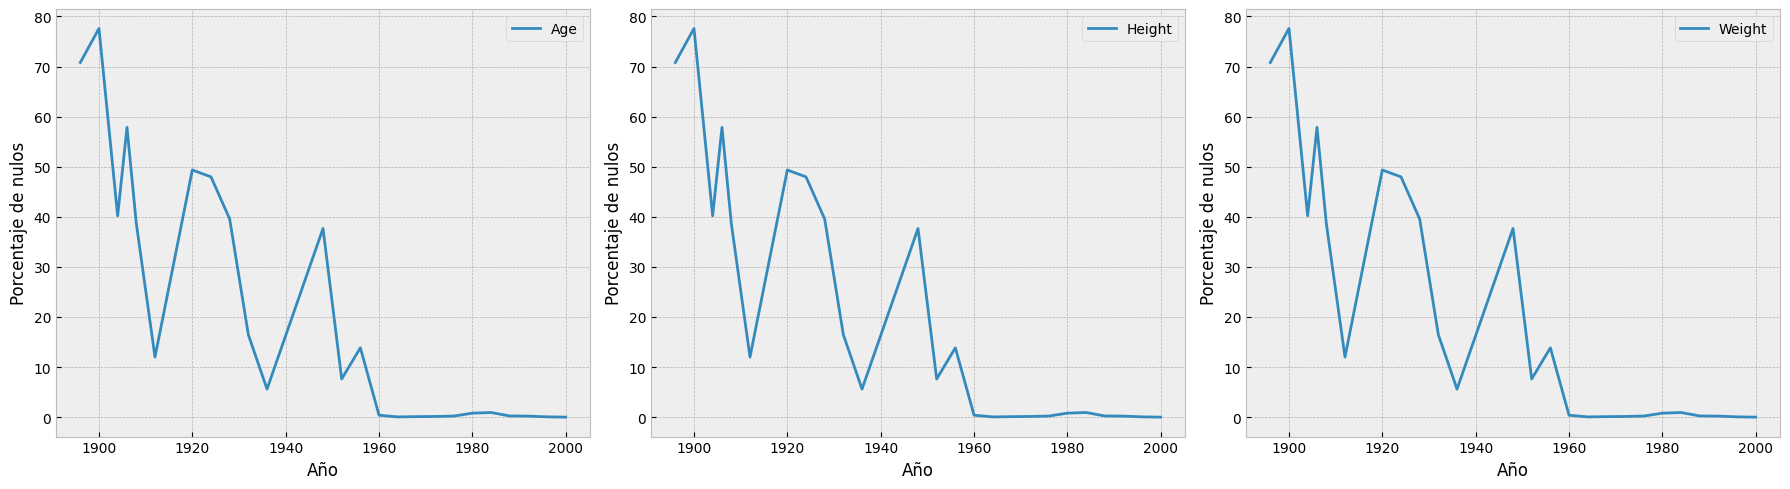

In [14]:
# Filtramos los valores nulos para Age, Height y Weight
null_values = df[(df["Age"].isna())
                 & (df["Height"].isna())
                 & (df["Weight"].isna())][["Year", "Age", "Height", "Weight"]]

null_values = null_values.fillna(1)

# Contamos los valores nulos por año
count_nulls = null_values.groupby(["Year"]).count()

# Filtramos los valores no nulos para Age, Height y Weight
not_null_values = df[(~df["Age"].isna())
                     & (~df["Height"].isna())
                     & (~df["Weight"].isna())][["Year", "Age", "Height", "Weight"]]

count_not_nulls = not_null_values.groupby(["Year"]).count()

null_ratios = count_nulls/(count_nulls+count_not_nulls)

# # Graficamos los resultados
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, ax in enumerate(axs):
    ax.plot(null_ratios.index,
            null_ratios.iloc[:, i]*100, 
            label=null_ratios.columns[i])
    ax.set_xlabel("Año")
    ax.set_ylabel("Porcentaje de nulos")
    ax.legend()

plt.tight_layout()

In [15]:
# Se filtran los datos para años posteriores a 1960
df = df[df["Year"]>=1960]

#### Imputación de los datos nulos. Columnas: *Age*, *Height* y *Weight*

Luego de la eliminación de los datos previos a 1960, se imputarán los datos nulos restantes de las columnas *Age*, *Height* y *Weight*, utilizando la mediana de los datos de la siguiente manera:

* Es de sentido común que el peso de los deportistas es altamente variable dependiendo del deporte que practican (por ejemplo, la diferencia entre un levantador de pesas promedio y un maratonista promedio) y también es esperable que exista una diferencia significativa de los pesos y estaturas entre hombres y mujeres, en todas las categorías.
* Por lo tanto, se aplicará la imputación de los datos nulos utilizando la mediana de los datos agrupados por Sexo y Deporte.



In [16]:
# Se imputan los datos agrupados por sexo y deporte, reemplazando valores nulos por la media de cada grupo
df["Age"] = df.groupby(["Sex", "Sport"])["Age"].transform(lambda x: x.fillna(x.median()))
df["Height"] = df.groupby(["Sex", "Sport"])["Height"].transform(lambda x: x.fillna(x.median()))
df["Weight"] = df.groupby(["Sex", "Sport"])["Weight"].transform(lambda x: x.fillna(x.median()))

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,165162.0,24.983725,5.674589,11.0,21.0,24.0,28.0,71.0
Height,165162.0,175.532038,10.944809,127.0,168.0,175.0,183.0,226.0
Weight,165162.0,70.610207,14.765143,25.0,60.0,70.0,79.0,214.0
Year,165162.0,1991.410276,16.821702,1960.0,1976.0,1992.0,2004.0,2016.0


#### Reset index

Finalmente, se deben resetear los indices del Dataframe utilizando el método `reset_index()`.

In [17]:
df.reset_index(inplace=True, drop=True)

### 5.3. Label Encoding

Se reemplazan los valores categóricos por valores numéricos que puedan ser incluidos en el modelo de machine learning. Como el número de categorías en varias columnas es muy grande, es conveniente utilizar la clase `LabelEncoder()` del paquete `sklearn`.

In [18]:
# Dataframe previo a la aplicación de los LabelEncoders
df.head()

,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,M,31.0,172.0,70.0,Finland,FIN,2000,Sydney,Badminton,Badminton Men's Singles,No Medal
3,F,30.0,159.0,55.5,Finland,FIN,1996,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal
4,F,34.0,159.0,55.5,Finland,FIN,2000,Sydney,Sailing,Sailing Women's Windsurfer,No Medal


In [19]:
from sklearn.preprocessing import LabelEncoder

# Se crea una copia del dataframe para no perder información
df_n = df.copy(deep=True)

# Se crean los LabelEncoders para todas las columnas categóricas
le_sex = LabelEncoder()
df_n["Sex"] = le_sex.fit_transform(df["Sex"])

le_team = LabelEncoder()
df_n["Team"] = le_team.fit_transform(df["Team"])

le_noc = LabelEncoder()
df_n["NOC"] = le_noc.fit_transform(df["NOC"])

le_city = LabelEncoder()
df_n["City"] = le_city.fit_transform(df["City"])

le_sport = LabelEncoder()
df_n["Sport"] = le_sport.fit_transform(df["Sport"])

le_event = LabelEncoder()
df_n["Event"] = le_event.fit_transform(df["Event"])

le_medal = LabelEncoder()
df_n["Medal"] = le_medal.fit_transform(df["Medal"])

# Se almacenan los LabelEncoders en un diccionario para posterior uso.
# Se utilizan convenientemente como 'keys' los mismos nombres de las columnas
# del Dataframe
label_encoders = {
    "Sex": le_sex,
    "Team": le_team,
    "NOC": le_noc,
    "City": le_city,
    "Sport": le_sport,
    "Event": le_event,
    "Medal": le_medal,
}

# Dataframe resultante
df_n.head()

,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,24.0,180.0,80.0,99,39,1992,2,4,61,2
1,1,23.0,170.0,60.0,99,39,2012,4,17,178,2
2,1,31.0,172.0,70.0,166,65,2000,13,2,56,2
3,0,30.0,159.0,55.5,166,65,1996,1,22,238,2
4,0,34.0,159.0,55.5,166,65,2000,13,22,238,2


### 5.4. Detección de outliers

Las columnas sobre las que se pueden analizar outliers son *Age*, *Height* y *Weight*. Es necesario poner énfasis en el hecho de que no es posible analizar los outliers de forma univariada, esto debido al hecho de que la distribución de los datos es altamente dependiente del tipo de deporte y el sexo. Como ejemplo, se muestra la comparación de las estaturas de las categorías deportivas de *Basketball* y *Athletics*, a través de un histograma de densidad, que muestra claramente la diferencia entre ambos grupos.

Por lo tanto, lo que se realizará es una detección multivariada de outliers, utilizando como método el cálculo del Z-score calculando la distancia euclideana en varias dimensiones. Las dimensiones que se incluyen en el análisis serán:

* *Age*, *Weight* y *Height*
* *Sex*
* *Sport*

#### Ejemplo de distribución de Estaturas: Basketball vs Athletics

Text(0.5, 1.0, 'Comparación distribución de Estaturas \n Basketball vs Athletics')

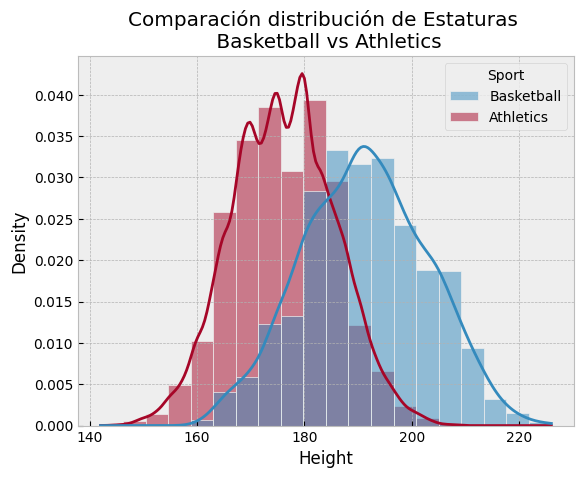

In [20]:
# Se crea un dataframe para comparar la distribución de los pesos para dos categorías deportivas
df_comparison = df[(df["Sport"] == "Basketball")
                   | (df["Sport"] == "Athletics")]

# Se grafica histograma para comparar estaturas
ax = sns.histplot(data=df_comparison, x="Height", hue="Sport",
             bins=20, stat="density", common_norm=False, kde=True)
ax.set_title("Comparación distribución de Estaturas \n Basketball vs Athletics")

#### Cálculo de Outliers Multivariados

In [21]:
# Se define la función para calcular los outliers multivariados
def outlier_euclideano_d(df: pd.DataFrame, cutoff: float):
    """Mide la distancia euclideana entre al vector de la media de todas las variables de df,
    calcula el Z score de la distancia respecto a la media para cada instancia. Luego devuelve
    un vector de resultados de cuales instancias son outliers basado en este criterio."""
    # df: dataframe con valores numericos normalizados
    result_ = pd.Series([0] * len(df.iloc[:, 1])) # se genera una Serie con ceros con largo igual al largo de las columnas
    data_mean = df.mean()  # media de los datos_ 
    # Distancia euclideana
    dist = np.sqrt(np.sum(((df-data_mean) ** 2), axis=1))
    dist_mean = dist.mean()  # media de las distancia
    dist_zscore = np.abs((dist - dist_mean) / dist.std())  # z-score para las distancias
    result_[((dist_zscore > cutoff))] = 1
    return result_

In [22]:
# Se calcula una versión normalizada de los datos
from sklearn.preprocessing import MinMaxScaler

# Se realiza una copia de los datos para normalizar
df_norm = df_n[["Sex", "Age", "Weight", "Height", "Sport"]].copy(deep=True)
df_norm[["Sex", "Age", "Weight", "Height", "Sport"]] = MinMaxScaler() \
    .fit_transform(df_norm[["Sex", "Age", "Weight", "Height", "Sport"]])

# Se calculan los outliers del dataset
df_norm["outlier"] = outlier_euclideano_d(df_norm, 2)
df_norm.head()

,Sex,Age,Weight,Height,Sport,outlier
0,1.0,0.216667,0.291005,0.535354,0.114286,0
1,1.0,0.200000,0.185185,0.434343,0.485714,0
2,1.0,0.333333,0.238095,0.454545,0.057143,0
3,0.0,0.316667,0.161376,0.323232,0.628571,0
4,0.0,0.383333,0.161376,0.323232,0.628571,0


In [23]:
# se añade la columna outlier a la versión no normalizada del Dataframe
df_n["outlier"] = df_norm["outlier"]
df["outlier"] = df_norm["outlier"]

#### Gráfico de outliers

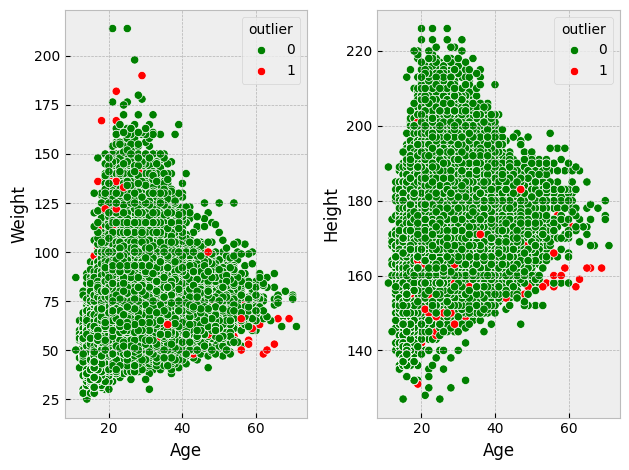

In [24]:
plt.figure()
plt.subplot(1, 2, 1)
sns.scatterplot(x="Age", y="Weight", data=df_n,
                hue="outlier", palette=["green", "red"])
plt.subplot(1, 2, 2)
sns.scatterplot(x="Age", y="Height", data=df_n,
                hue="outlier", palette=["green", "red"])
plt.tight_layout()

#### Eliminación de outliers

Se decide eliminar los outliers multivariados calculados en la etapa anterior. Se eliminan los datos filtrando por la columna *outlier*

In [25]:
# Se filtran solo las filas que contengan "outlier == 0"
df_n = df_n[df_n["outlier"] == 0]
df = df[df["outlier"] == 0]

# Se elimina la columna "outlier"
df_n.drop(columns="outlier", inplace=True)
df.drop(columns="outlier", inplace=True)

# Se resetean los indices
df_n.reset_index(inplace=True, drop=True)
df.reset_index(inplace=True, drop=True)

### 5.5. Dataframe resultante

El dataframe resultante del proceso de limpieza se muestra a continuación.

In [26]:
df_n.head()

,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,24.0,180.0,80.0,99,39,1992,2,4,61,2
1,1,23.0,170.0,60.0,99,39,2012,4,17,178,2
2,1,31.0,172.0,70.0,166,65,2000,13,2,56,2
3,0,30.0,159.0,55.5,166,65,1996,1,22,238,2
4,0,34.0,159.0,55.5,166,65,2000,13,22,238,2


In [27]:
df_n.sample(5)

,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
136157,1,25.0,180.0,73.0,127,191,1968,6,8,111,2
65368,1,25.0,187.0,75.0,335,145,1976,7,22,230,2
80049,1,28.0,188.0,80.0,234,97,1984,5,32,327,0
118789,1,30.0,170.0,65.0,99,39,2016,10,9,131,0
156901,0,17.0,171.0,60.0,147,73,1972,9,25,294,3


In [28]:
df_n.tail()

,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
164403,0,23.0,171.0,64.0,391,166,2004,0,1,38,3
164404,1,23.0,168.0,76.0,19,7,2000,13,16,176,2
164405,1,27.0,168.0,76.0,19,7,2004,0,16,176,2
164406,1,21.0,175.0,75.0,497,209,1972,9,12,156,2
164407,0,33.0,171.0,69.0,46,24,2016,10,4,62,2


#### Descripción de los datos posterior a la limpieza y transformación

In [29]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164408 entries, 0 to 164407
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     164408 non-null  int32  
 1   Age     164408 non-null  float64
 2   Height  164408 non-null  float64
 3   Weight  164408 non-null  float64
 4   Team    164408 non-null  int32  
 5   NOC     164408 non-null  int32  
 6   Year    164408 non-null  int64  
 7   City    164408 non-null  int32  
 8   Sport   164408 non-null  int32  
 9   Event   164408 non-null  int32  
 10  Medal   164408 non-null  int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 9.4 MB


In [30]:
df_n.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,164408.0,0.673830,0.468812,0.0,0.0,1.0,1.0,1.0
Age,164408.0,24.978718,5.661228,11.0,21.0,24.0,28.0,71.0
Height,164408.0,175.594415,10.913735,127.0,168.0,175.0,183.0,226.0
Weight,164408.0,70.636113,14.737164,25.0,60.0,70.0,79.0,214.0
Team,164408.0,263.707301,154.104619,0.0,134.0,234.0,417.0,534.0
NOC,164408.0,104.858535,63.470677,0.0,59.0,94.0,161.0,222.0
Year,164408.0,1991.329741,16.810590,1960.0,1976.0,1992.0,2004.0,2016.0
City,164408.0,6.627670,4.462941,0.0,3.0,6.0,11.0,14.0
Sport,164408.0,14.764683,10.208522,0.0,6.0,14.0,23.0,35.0
Event,164408.0,169.006162,102.503511,0.0,76.0,167.0,262.0,368.0


## 6. Analisis exploratorio de datos<a class="anchor" id="analisis-datos"></a>

###  6.1. Análisis univariado

Se estudia el resultado de medalla olímpica en contraste con otras variables del dataset una a una. En este caso se seleccionaran:

* NOC
* Sex

#### Analisis *Medal* vs *NOC*

Se observa claramente del gráfico que el número de medallas está fuertemente concentrado en los primeros 3 o 4 puestos. Por lo tanto, es esperable que el comité olimpico al que pertenece el competidor tenga una alta correlación con el resultado de medalla olímpica.

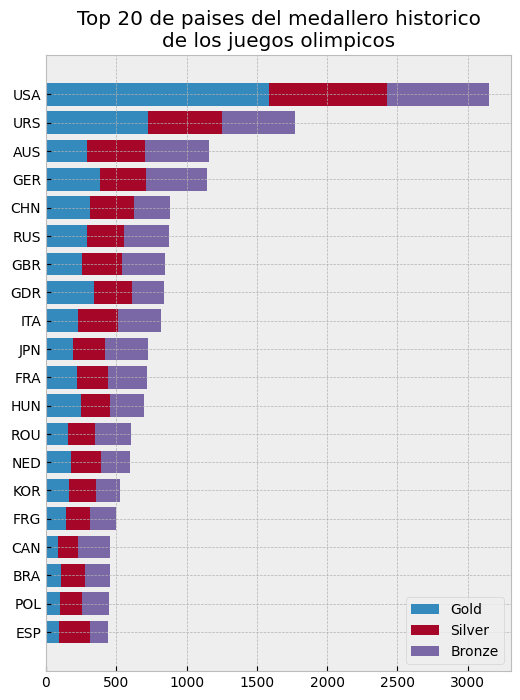

In [31]:
medals_by_noc_and_medal = df[df.Medal.notnull()] \
    .groupby(["NOC", "Medal"]) \
    .count()

medals = pd.DataFrame()
medals["Gold"] = medals_by_noc_and_medal.xs("Gold", level=1)["Event"]
medals["Silver"] = medals_by_noc_and_medal.xs("Silver", level=1)["Event"]
medals["Bronze"] = medals_by_noc_and_medal.xs("Bronze", level=1)["Event"]

medals.fillna(0, inplace=True)

medals = medals.astype(dtype=np.int64)

medals["Total"] = medals["Gold"] + medals["Silver"] + medals["Bronze"]

# Obtener el top 20 de paises con mas medallas
medals = medals.sort_values("Total", ascending=False)
top_twenty = medals[:20]

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title("Top 20 de paises del medallero historico\nde los juegos olimpicos")
ax.barh(top_twenty.index, top_twenty["Gold"], label="Gold")
ax.barh(top_twenty.index, top_twenty["Silver"], label="Silver", left=top_twenty["Gold"])
ax.barh(top_twenty.index, top_twenty["Bronze"], label="Bronze", left=top_twenty["Gold"]+top_twenty["Silver"])
ax.invert_yaxis()
ax.legend()


#### Analisis *Medal* vs *Sex*

Se observa que el número de medallas obtenidas por deportistas masculinos es aproximadamente el doble del numero de medallas obtenidas por deportistas femeninos. Esto se confirma al graficar los resultados en formato *pie chart* agrupados por *Sex* y *Medal*. Por lo tanto, también es esperable que la variable *Sex* tenga una alta correlación con el resultado obtenido.

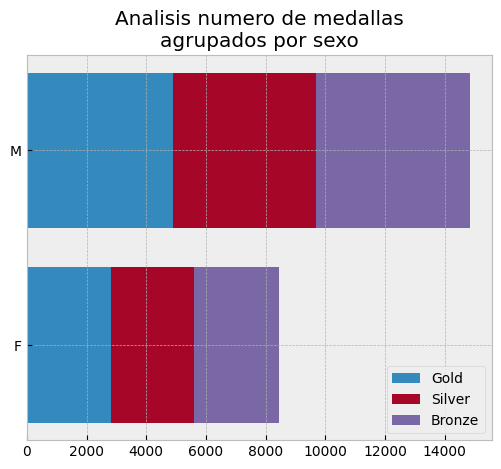

In [32]:
medals_by_sex_and_medal = df[df.Medal.notnull()] \
    .groupby(["Sex", "Medal"]) \
    .count()

medals = pd.DataFrame()
medals["Gold"] = medals_by_sex_and_medal.xs("Gold", level=1)["Event"]
medals["Silver"] = medals_by_sex_and_medal.xs("Silver", level=1)["Event"]
medals["Bronze"] = medals_by_sex_and_medal.xs("Bronze", level=1)["Event"]

medals.fillna(0, inplace=True)

medals = medals.astype(dtype=np.int64)

fig, ax = plt.subplots(figsize=(6, 5))
ax.set_title("Analisis numero de medallas\nagrupados por sexo")
ax.barh(medals.index, medals["Gold"], label="Gold")
ax.barh(medals.index, medals["Silver"], label="Silver", left=medals["Gold"])
ax.barh(medals.index, medals["Bronze"], label="Bronze", left=medals["Gold"]+medals["Silver"])
ax.legend()

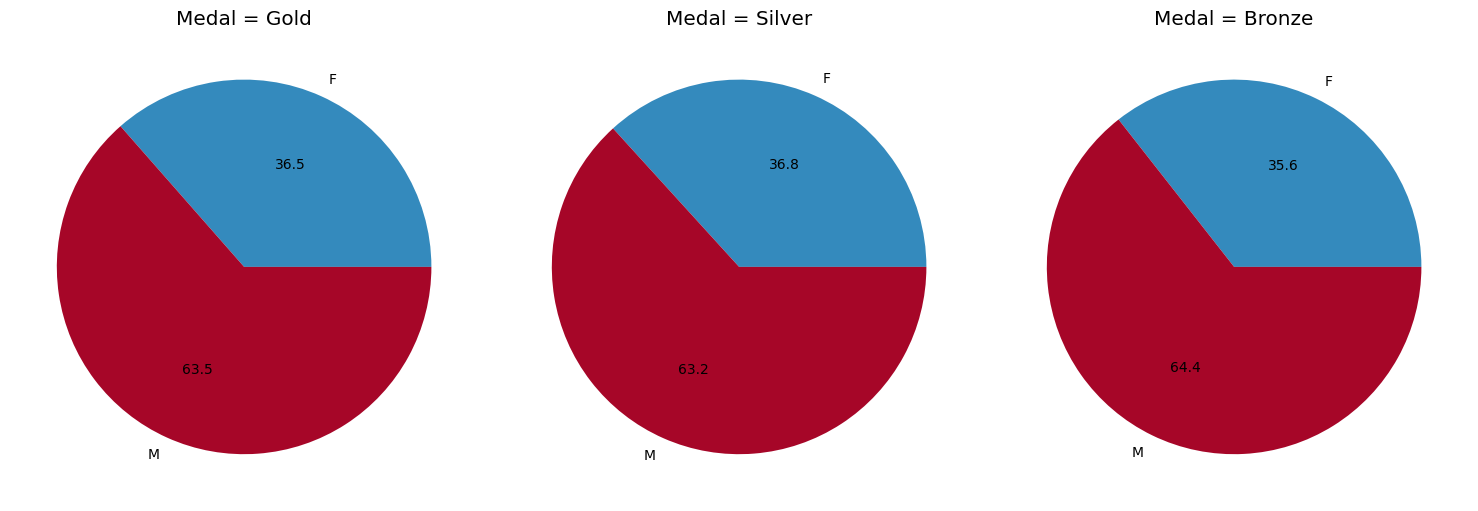

In [33]:
# Se grafican los resultados en formato pie chart
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

cols = medals.columns
for i, ax in enumerate(axs):
    ax.pie(medals.iloc[:, i], labels=medals.index, autopct="%1.1f")
    ax.set_title(f"Medal = {cols[i]}")

plt.tight_layout()

### 6.2. Análisis multivariado

Se realiza un gráfico tipo `heatmap` que muestra la matriz de correlación de las distintas variables de estudio. Para ello se seleccionan todas las columnas del Dataframe `df_n` que contiene todas las variables codificadas numericamente.

En relación al gráfico se pueden realizar las siguientes observaciones_

* Sport y Event tienen una correlación casi perfecta. Esto puede significar que una de las dos es redundante desde un punto de vista estadístico, y por lo tanto, para el modelo de machine learning. Se sugiere eliminar una de las variables en la etapa de *Feature Selection*

* Height y Weight tienen una alta correlación entre ellas. Esto puede significar que hay un parametro que se puede formar entre ellas, por ejemplo, el BMI (o índice de masa corporal) y de esta forma reducir aún más las dimensionalidad del modelo.

* Team y NOC también tienen una alta correlación entre ellas. Esto se debe a que los comités olímpicos y los equipos olimpicos pertenecen siempre a los mismos países, y la diferencia se debe unicamente a que existen en algunos casos mas de un equipo olimpico para un determinado comité. Se sugiere eliminar una de las variables para reducir la dimensionalidad del modelo.

In [34]:
df_n.head()

,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,24.0,180.0,80.0,99,39,1992,2,4,61,2
1,1,23.0,170.0,60.0,99,39,2012,4,17,178,2
2,1,31.0,172.0,70.0,166,65,2000,13,2,56,2
3,0,30.0,159.0,55.5,166,65,1996,1,22,238,2
4,0,34.0,159.0,55.5,166,65,2000,13,22,238,2


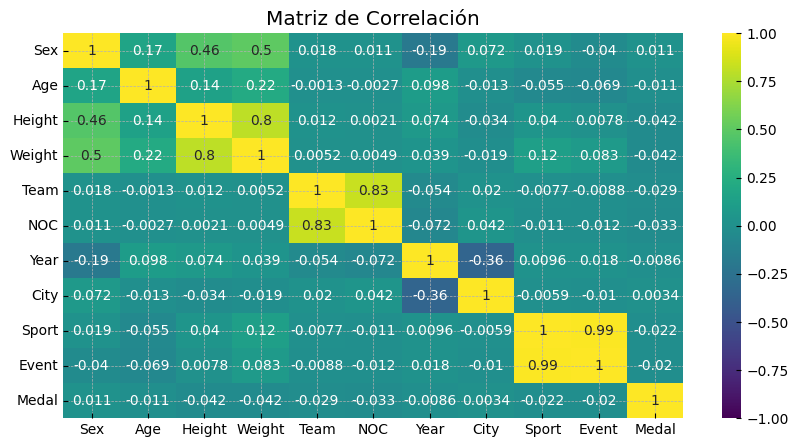

In [37]:
plt.figure(figsize=(10, 5))
# correlation_matrix = df_n[["Sex", "Age", "Weight",
#                            "Team", "NOC", "Year",
#                            "City", "Sport", "Event", "Medal"]].corr()
correlation_matrix = df_n.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

#### Test de reducción de dimensionalidad

Se realiza una primera aproximación de la reducción de las dimensiones basados en las observaciones de la sección anterior. Se eliminan las variables *Event* y *Team*, y se agrega la columna *bmi*, eliminando las columnas *Height* y *Weight*.

In [38]:
# Se genera una copia del Dataframe numérico
df_test = df_n.copy(deep=True)

# Se eliminan columnas Team y Event
df_test.drop(columns=["Team", "Event"], inplace=True)

# Se agrega la columna bmi con el valor del indice de masa corporal
df_test["bmi"] = df_n["Weight"]/(df_n["Height"]**2)

# Se eliminan las columnas Weight y Height
df_test.drop(columns=["Weight", "Height"], inplace=True)

# Se resetean los indices
df_test.reset_index(inplace=True, drop=True)

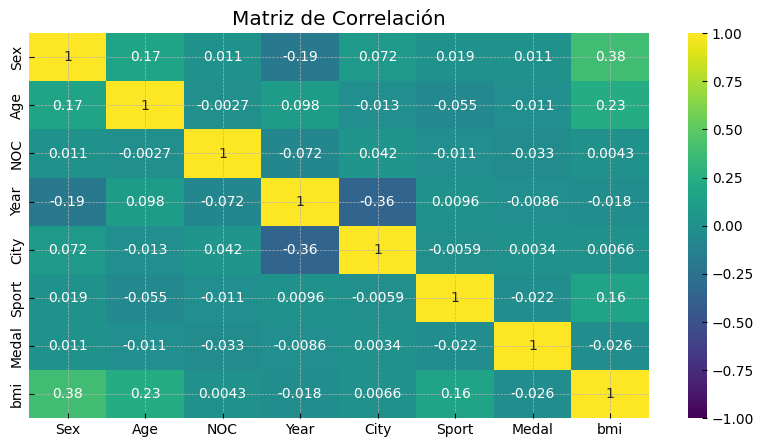

In [39]:
plt.figure(figsize=(10, 5))
correlation_matrix = df_test.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

## 7. Conclusiones

En el presente notebook, que corresponde a las Parte II del proyecto final del curso de Data Science I de Coderhouse, se ha realizado la limpieza y transformación de los datos y luego un análisis exploratorio de los mismos. Respecto al trabajo realizado se pueden obtener las siguientes conclusiones.

#### Limpieza y transformación de datos

* Se encontraron dimensiones redundantes o que no aportan información relevante para el resultado de Medalla obtenida. En estos casos se ha optado por eliminar estas dimensiones.

* Se encontró que tanto para las dimensiones *Height* y *Weight* existen un alto porcentaje de datos nulos para años previos a 1960. Por este motivo, se ha decidido realizar el análisis considerando desde el año 1960 en adelante.

* Para los datos nulos se ha optado por la imputación de la mediana de cada dimensión.

* Debido a la alta cantidad de categorías en las dimensiones categóricas se ha optado por utilizar LabelEncoder para la codificación de categorías.

* Debido a la complejidad y multidimensionalidad del dataset se ha utilizado el método Z-Score multivariado para la determinación de los outliers. Finalmente, se ha optado por la eliminación de estos.

#### Analisis exploratorio de datos

* En un análisis univariado de *NOC* se ha encontrado que USA es el comité olimpico con mayor cantidad de medallas olimpicas, superando aproximadamente al segundo lugar por el doble de medallas.

* En el análisis univariado de *Sex* se ha encontrado que los deportistas masculinos han obtenido aproximadamente el 63% de las medallas olímpicas.

* En un análisis multivariado se ha encontrado que los pares de dimensiones *Team* y *NOC*, *Sport* y *Event*, *Height* y *Weight* estan altamente correlacionadas entre si. Se ha sugerido eliminar *Team* y *Event* de forma de reducir la dimensionalidad del modelo. Por otro lado, se ha sugerido que las dimensiones *Height* y *Weight* sean combinadas en una unica dimensión *bmi* que corresponde al indice de masa corporal.